<a href="https://colab.research.google.com/github/nijuniju/skripsi/blob/main/TF_IDF%2CSplit%2CSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TF-IDF##

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df = pd.read_csv("/content/drive/MyDrive/Data/data_labelled.csv")
df.head()

,data_token,data_slang,data_stopwords,data_stemmed,sentiment
0,"['kenapa', 'selalu', 'bermasalah', 'ini', 'ico...","['kenapa', 'selalu', 'bermasalah', 'ini', 'ico...","['kenapa', 'selalu', 'bermasalah', 'ini', 'ico...",kenapa selalu masalah ini iconnet tagih selalu...,negative
1,"['baru', 'di', 'pake', 'error', 'lagi', 'mauny...","['baru', 'di', 'pakai', 'gangguan', 'lagi', 'm...","['baru', 'di', 'pakai', 'gangguan', 'lagi', 'm...",baru di pakai ganggu lagi mau apa sih sampai s...,negative
2,"['cape', 'bgt', 'hari-hari', 'gini', 'mulu']","['kesal', 'sekali', 'hari-hari', 'begini', 'se...","['kesal', 'sekali', 'hari-hari', 'begini', 'se...",kesal sekali hari begini selalu,negative
3,"['gangguan', 'lagi']","['gangguan', 'lagi']","['gangguan', 'lagi']",ganggu lagi,negative
4,"['udah', '3', 'hari', 'gak', 'bisa', 'akses', ...","['sudah', '3', 'hari', 'tidak', 'bisa', 'akses...","['sudah', '3', 'hari', 'tidak', 'bisa', 'akses...",sudah 3 hari tidak bisa akses internet tidak a...,negative


In [23]:
# Inisialisasi objek TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transformasi teks menjadi representasi TF-IDF
vectors = vectorizer.fit_transform(df['data_stemmed'])

# Menyimpan hasil TF-IDF ke file CSV
df_tfidf.to_csv('data_tfidf.csv', index=False)

# Menampilkan hasil
print(vectors)

  (0, 2117)	0.4086815451571274
  (0, 1960)	0.4493912049243232
  (0, 225)	0.27015639900368826
  (0, 1896)	0.3636490852085891
  (0, 732)	0.08887594118538843
  (0, 788)	0.15276776146893867
  (0, 1173)	0.21450788483113092
  (0, 1737)	0.5313104550155383
  (0, 951)	0.25741104941241477
  (1, 1180)	0.24423720967585255
  (1, 1677)	0.2247194278045672
  (1, 1763)	0.4039367621541981
  (1, 910)	0.2700427552981626
  (1, 134)	0.28154384843217695
  (1, 1782)	0.37742431516254066
  (1, 1692)	0.2018204824674057
  (1, 1799)	0.23375276619203486
  (1, 125)	0.26400267267590244
  (1, 1183)	0.21403997153137025
  (1, 1058)	0.21964807015691232
  (1, 606)	0.17580528304172038
  (1, 1424)	0.22367320164770937
  (1, 469)	0.1778329723333389
  (1, 216)	0.24567436070972318
  (2, 230)	0.45747708855681346
  :	:
  (705, 831)	0.14939536031300787
  (705, 1078)	0.15658590689190946
  (705, 336)	0.15746517127399248
  (705, 238)	0.146551452586602
  (705, 47)	0.3175760924926471
  (705, 799)	0.10016454346252941
  (705, 78)	0.20431

##split data##

In [24]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data uji dan validasi
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Memisahkan data menjadi data uji dan validasi (50%)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Menghitung jumlah sampel di setiap set data
n_train = x_train.shape[0]
n_test = x_test.shape[0]
n_val = x_val.shape[0]

In [25]:
# Konversi ke numpy arrays untuk memastikan indexing yang benar
x_train = x_train.toarray() if hasattr(x_train, 'toarray') else x_train
x_temp = x_temp.toarray() if hasattr(x_temp, 'toarray') else x_temp
x_test = x_test.toarray() if hasattr(x_test, 'toarray') else x_test
x_val = x_val.toarray() if hasattr(x_val, 'toarray') else x_val
y_train = y_train.values if hasattr(y_train, 'values') else y_train
y_temp = y_temp.values if hasattr(y_temp, 'values') else y_temp
y_test = y_test.values if hasattr(y_test, 'values') else y_test
y_val = y_val.values if hasattr(y_val, 'values') else y_val

##Visualisasi##

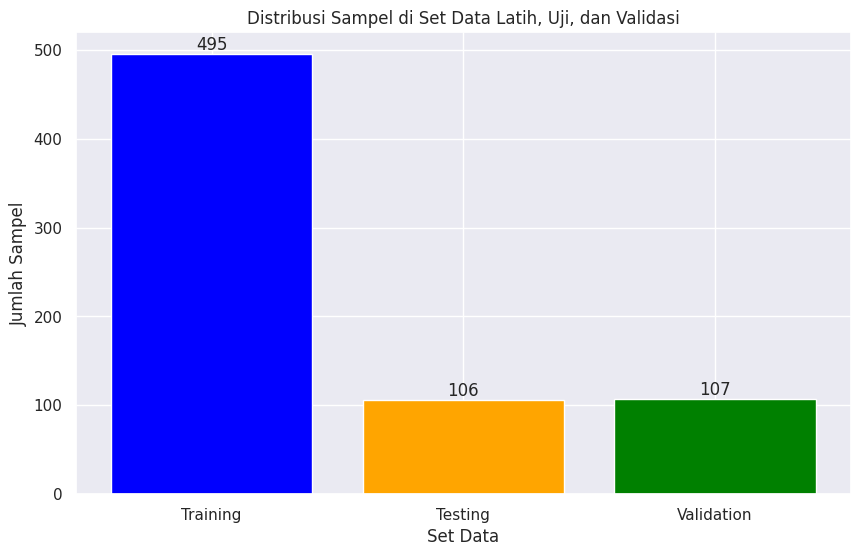

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data set dan jumlah sampel
data_sets = ['Training', 'Testing', 'Validation']
counts = [n_train, n_test, n_val]

# Membuat plot bar dengan matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(data_sets, counts, color=['blue', 'orange', 'green'])

# Menambahkan anotasi pada batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Sampel di Set Data Latih, Uji, dan Validasi')
plt.xlabel('Set Data')
plt.ylabel('Jumlah Sampel')

# Menampilkan plot
plt.show()

##klasifikasi SVM##

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Inisialisasi model SVM dan pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # Normalisasi fitur tanpa mengatur mean
    ('smote', SMOTE(random_state=42)),  # Oversampling
    ('svm', SVC(kernel='sigmoid', random_state=42))  # SVM dengan kernel linear
])

# Inisialisasi StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi variabel untuk menyimpan hasil
all_y_true = []
all_y_pred = []

# Proses K-Fold Cross Validation
for train_index, test_index in kf.split(x_train, y_train):
    # Mengambil data berdasarkan indeks
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Melatih model
    pipeline.fit(x_train_fold, y_train_fold)

    # Memprediksi
    y_pred = pipeline.predict(x_test_fold)

    # Menyimpan hasil prediksi dan label sebenarnya
    all_y_true.extend(y_test_fold)
    all_y_pred.extend(y_pred)

# Mengubah list menjadi array numpy
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

##Evaluasi SVM##

In [29]:
# Inisialisasi variabel untuk menyimpan confusion matrix
conf_matrices = []

# Menghitung confusion matrix untuk fold ini dan menyimpannya
conf_matrix = confusion_matrix(y_test_fold, y_pred)
conf_matrices.append(conf_matrix)

# Menghitung rata-rata confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0).astype(int)

# Mengubah list menjadi array numpy
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

# Menghitung metrik evaluasi
accuracy = accuracy_score(all_y_true, all_y_pred)
precision = precision_score(all_y_true, all_y_pred, average='weighted', zero_division=0)
recall = recall_score(all_y_true, all_y_pred, average='weighted', zero_division=0)
f1 = f1_score(all_y_true, all_y_pred, average='weighted', zero_division=0)

# Menampilkan hasil evaluasi
print(f"Rata-rata Akurasi: {accuracy:.4f}")
print(f"Rata-rata Precision: {precision:.4f}")
print(f"Rata-rata Recall: {recall:.4f}")
print(f"Rata-rata F1 Score: {f1:.4f}")

Rata-rata Akurasi: 0.8747
Rata-rata Precision: 0.8326
Rata-rata Recall: 0.8747
Rata-rata F1 Score: 0.8516


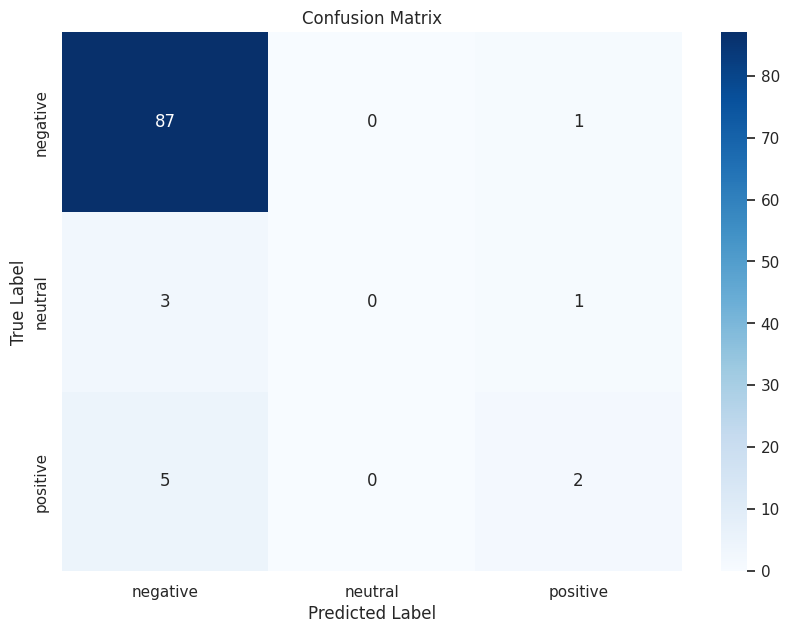

In [30]:
# Menampilkan confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()